### We are required to build the model to predict or estimate the price of used cars with the available features. It will be used by the management to understand how exactly the prices vary with these features. They can accordingly apply the pricing strategy for their used cars. 

### Further, the model will be a good way for management to understand the pricing dynamics of a market.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
import missingno as ms

In [2]:
df=pd.read_excel('D:\PGCP-DSML RITHEESH V\Machine learning\ML-Assignment 1\dataset_Assignment-1.xlsx')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


In [4]:
df.info()
df1=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          200 non-null    object 
 4   aspiration        203 non-null    object 
 5   doornumber        202 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        198 non-null    object 
 8   wheelbase         202 non-null    float64
 9   carlength         202 non-null    float64
 10  carwidth          200 non-null    float64
 11  carheight         198 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    201 non-null    object 
 15  enginesize        199 non-null    float64
 16  fuelsystem        197 non-null    object 
 1

In [5]:
df1.shape

(205, 25)

In [6]:
df1.drop(['car_ID','symboling','drivewheel','cylindernumber'],axis=1,inplace=True)

## TREATING MISSING VALUES

In [7]:
df1.isnull().sum()

CarName              0
fueltype             5
aspiration           2
doornumber           3
carbody              0
wheelbase            3
carlength            3
carwidth             5
carheight            7
curbweight           0
enginetype           0
enginesize           6
fuelsystem           8
boreratio            4
stroke              10
compressionratio     4
horsepower           0
peakrpm              0
citympg             12
highwaympg           9
price                0
dtype: int64

In [8]:
df1.fueltype.fillna(df1.fueltype.mode()[0],inplace=True)
df1.aspiration.fillna(df1.aspiration.mode()[0],inplace=True)
df1.doornumber.fillna(df1.doornumber.mode()[0],inplace=True)
df1.wheelbase.fillna(df1.wheelbase.median(),inplace=True)  
df1.carlength.fillna(df1.carlength.median(),inplace=True)
df1.carwidth.fillna(df1.carwidth.median(),inplace=True)
df1.carheight.fillna(df1.carheight.median(),inplace=True)
df1.enginesize.fillna(df1.enginesize.median(),inplace=True)
df1.fuelsystem.fillna(df1.fuelsystem.mode()[0],inplace=True)
df1.boreratio.fillna(df1.boreratio.median(),inplace=True)
df1.stroke.fillna(df1.stroke.median(),inplace=True)
df1.compressionratio.fillna(df1.compressionratio.median(),inplace=True)
df1.citympg.fillna(df1.citympg.median(),inplace=True)
df1.highwaympg.fillna(df1.highwaympg.median(),inplace=True)

### DATA ENCODING

In [9]:
le=LabelEncoder()
for i in ['CarName','fueltype','aspiration','doornumber','carbody','enginetype','fuelsystem']:
    df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

C:\Users\velur\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df1

,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,130.0,5,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,130.0,5,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,1,1,0,1,2,94.5,171.2,65.5,52.4,2823,...,152.0,5,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,1,0,0,3,99.8,176.6,66.2,54.3,2337,...,109.0,5,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,1,0,0,3,99.4,176.6,66.4,54.3,2824,...,136.0,5,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,109.1,188.8,68.9,55.5,2952,...,141.0,5,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,138,1,1,0,3,109.1,188.8,68.8,55.5,3049,...,141.0,5,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,140,1,0,0,3,109.1,188.8,68.9,55.5,3012,...,173.0,5,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,142,0,1,0,3,109.1,188.8,68.9,55.5,3217,...,145.0,3,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [11]:
minmax=MinMaxScaler()
for i in ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']:
    df1[i]=minmax.fit_transform(df1[i].values.reshape(-1,1))

In [12]:
df1

,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,0.058309,0.413433,0.316667,0.083333,0.411171,...,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.235294,0.289474,0.207959
1,3,1,0,1,0,0.058309,0.413433,0.316667,0.083333,0.411171,...,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.235294,0.289474,0.282558
2,1,1,0,1,2,0.230321,0.449254,0.433333,0.383333,0.517843,...,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.176471,0.263158,0.282558
3,4,1,0,0,3,0.384840,0.529851,0.491667,0.541667,0.329325,...,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.323529,0.368421,0.219254
4,5,1,0,0,3,0.373178,0.529851,0.508333,0.541667,0.518231,...,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.147059,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,0.655977,0.711940,0.716667,0.641667,0.567882,...,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.294118,0.315789,0.291123
201,138,1,1,0,3,0.655977,0.711940,0.708333,0.641667,0.605508,...,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.176471,0.236842,0.345738
202,140,1,0,0,3,0.655977,0.711940,0.716667,0.641667,0.591156,...,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.147059,0.184211,0.406311
203,142,0,1,0,3,0.655977,0.711940,0.716667,0.641667,0.670675,...,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.382353,0.289474,0.430763


In [13]:
X=df1.drop('price',axis=1)
y=df1['price']

### TRAIN TEST SPLIT
- The data has been split into train data 80% and test data 20%
- Random state 35

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=35)

In [15]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(164, 20)
xtest shape(41, 20)
ytrain shape(164,)
ytest shape(41,)


### DECISION TREE REGRESSOR

In [16]:
dtreg=DecisionTreeRegressor()

In [17]:
dtreg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [18]:
ypred=dtreg.predict(xtest)
xtest.head()

,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
200,139,1,0,0,3,0.655977,0.711940,0.716667,0.641667,0.567882,3,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.294118,0.315789
133,103,1,0,0,3,0.364431,0.679104,0.516667,0.691667,0.468192,3,0.226415,5,0.714286,0.476190,0.14375,0.258333,0.448980,0.235294,0.315789
181,128,1,0,0,4,0.521866,0.697015,0.516667,0.525000,0.645074,0,0.377358,5,0.521429,0.609524,0.13750,0.450000,0.428571,0.176471,0.210526
157,116,1,0,0,2,0.265306,0.376119,0.341667,0.416667,0.240884,3,0.139623,1,0.464286,0.457143,0.12500,0.091667,0.265306,0.500000,0.552632
28,33,1,0,0,4,0.486880,0.500000,0.358333,1.000000,0.406129,3,0.222642,1,0.571429,0.661905,0.09375,0.166667,0.346939,0.323529,0.368421


In [19]:
r2_score(ytest,ypred)

0.9205326527260929

In [20]:
mean_squared_error(ytest,ypred)

0.0030942740765102605

In [21]:
mean_absolute_percentage_error(ytest,ypred)

0.24937688501625896

### INFERENCE
- Using DecisionTreeRegressor with deafult parameters r2_score is 88% 
- mean absolute percentage error is 23%

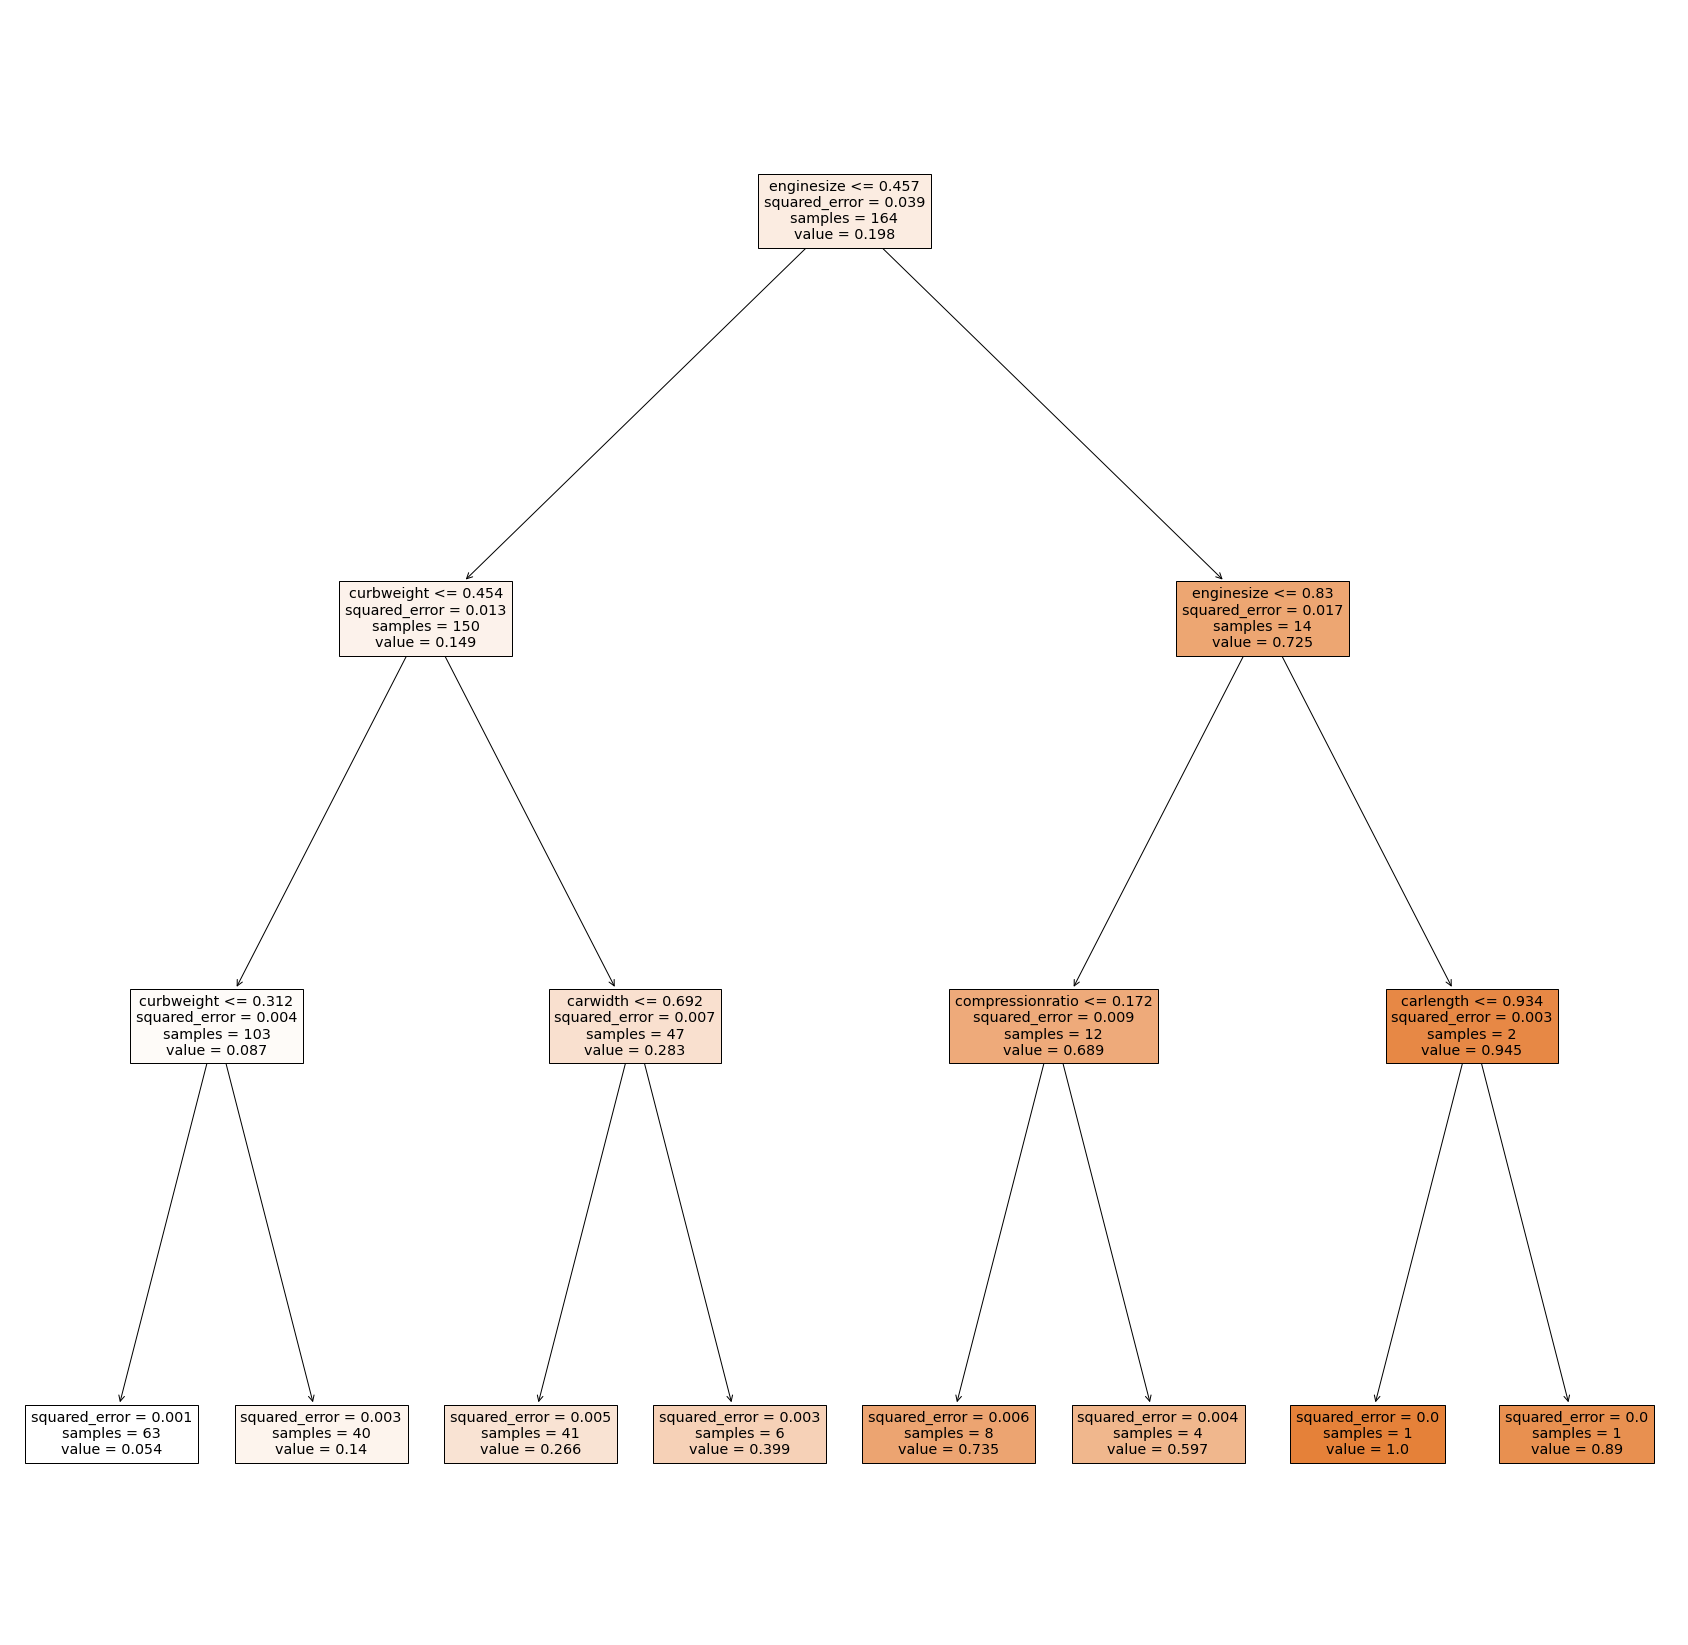

In [22]:
import matplotlib.pyplot as plt
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(xtrain,ytrain)
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(clf,feature_names=list(xtrain.columns.values),class_names=['0','1'],filled=True);

In [23]:
feat_imp = dtreg.feature_importances_
pd.Series(feat_imp,index=list(xtrain.columns.values)).sort_values(ascending=False)

enginesize          6.757181e-01
curbweight          2.303043e-01
carwidth            2.231567e-02
citympg             1.820051e-02
CarName             1.205717e-02
highwaympg          1.097782e-02
compressionratio    8.891137e-03
stroke              6.334174e-03
horsepower          6.013263e-03
carbody             3.553714e-03
carheight           3.292130e-03
carlength           1.521739e-03
wheelbase           5.501702e-04
peakrpm             1.411558e-04
fuelsystem          7.146532e-05
enginetype          2.973364e-05
aspiration          1.704749e-05
boreratio           1.060489e-05
doornumber          1.201688e-07
fueltype            0.000000e+00
dtype: float64

### GradientBoostingRegressor

In [24]:
gbr=GradientBoostingRegressor()

In [25]:
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [26]:
ypred=gbr.predict(xtest)

In [27]:
r2_score(ytest,ypred)

0.9627667721905588

In [28]:
mean_squared_error(ytest,ypred)

0.0014497754807197818

In [29]:
mean_absolute_percentage_error(ytest,ypred)

0.22103212814437212

### INFERENCE
- r2_score of gradientboostingregressor is 96% very high
- meanabsolute percentage error is 22%

### HYPERPARAMETER TUNING

### USING RANDOMIZED SEARCH CV

In [30]:
mod=RandomizedSearchCV(gbr,{'n_estimators':[i for i in range(100,250,10)],'learning_rate':[0.1,0.2,0.3,0.4,0.5],'max_depth':range(3,12)},cv=15)

In [31]:
mod.fit(xtrain,ytrain)

RandomizedSearchCV(cv=15, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': range(3, 12),
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240]})

In [32]:
mod.best_score_

0.8762223559006305

In [33]:
mod.best_params_

{'n_estimators': 170, 'max_depth': 3, 'learning_rate': 0.1}

In [34]:
ypred1=mod.predict(xtest)

In [35]:
r2_score(ytest,ypred1)

0.9581680850061821

In [36]:
mean_squared_error(ytest,ypred1)

0.0016288376871320639

In [37]:
mean_absolute_percentage_error(ytest,ypred1)

0.22138990857917765

### INFERENCE
- r2_score of randomized search cv is 92%
- with mean absolute percentage error of 22%

### ADABOOST REGRESSOR

In [38]:
abr=AdaBoostRegressor(n_estimators=100)

In [39]:
abr.fit(xtrain,ytrain)

AdaBoostRegressor(n_estimators=100)

In [40]:
ypred_abr=abr.predict(xtest)

In [41]:
r2_score(ytest,ypred_abr)

0.9369650385119952

In [42]:
mean_squared_error(ytest,ypred_abr)

0.002454435109981318

In [43]:
mean_absolute_percentage_error(ytest,ypred_abr)

0.44228396805099746

### INFERENCE 
- Adaboost has the r2_score of 94%
- With mean absolute percentage error of 42%

# OVERALL INFERENCE

- From the above used models ***GRADIENT BOOST REGRESSOR MODEL*** works best with highest **r2_score** and less **mean absolute percentage error**
- Using feature importance column we came to know ***Enginesize*** plays major role in model prediction
- ***Enginesize*** describe the price of used cars by **67%**